In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import os
import re
from os.path import join as pjoin

In [3]:
PIXEL_SIZE = 0.075

def read_clen(geometry_file_path):

    with open(geometry_file_path, "r") as f:
        regex = re.search("clen = (\d+\.\d+)", f.read())
        
    return round(float(regex.group(1)), 5)


def load_detector_shift_log(file_path):

    with open(file_path, "r") as f:
        regex = re.search("Mean shifts\: dx = ([-]?\d+\.\d+) mm,  dy = ([-]?\d+\.\d+) mm", f.read())

    x_shift = float(regex.group(1))
    y_shift = float(regex.group(2))

    return x_shift, y_shift

In [4]:
geometry_prefix = "/das/home/ext-lane_t/experiments/alvra_photolyase_reduction_2025/geometry-optimization/"

geometry_statistics = []

for run_number in range(8, 125):
    geom_opt_dir = pjoin(geometry_prefix, f"run{run_number:04d}")

    if os.path.exists(geom_opt_dir):

        try:

            clen = read_clen(
                pjoin(geom_opt_dir, f"{run_number:04d}_optimized.geom")
            )

            shifts = load_detector_shift_log(
                pjoin(geom_opt_dir, "detector-shift.log")
            )

            stats = pd.read_csv(
                pjoin(geom_opt_dir, "lattice_stats_summary.csv")
            )
            stats_at_opt = stats.loc[stats["clen"] == clen].to_dict(orient='records')[0]
            stats_at_opt.pop('Unnamed: 0')

            run_info = {
                "run_number": run_number,
                "x_shift": shifts[0],
                "y_shift": shifts[1],
            }
            run_info.update(stats_at_opt)

            geometry_statistics.append(run_info)

        except Exception as exptn:
            print(exptn)

    else:
        print(f"{geom_opt_dir} doesn't exist")

geometry_statistics = pd.DataFrame(geometry_statistics)
geometry_statistics

[Errno 2] No such file or directory: '/das/home/ext-lane_t/experiments/alvra_photolyase_reduction_2025/geometry-optimization/run0051/0051_optimized.geom'


,run_number,x_shift,y_shift,clen,indexed,std_a,std_b,std_c,std_alpha,std_beta,std_gamma,skew_a,skew_b,skew_c
0,8,0.0,0.0,0.09460,381,0.026438,0.029082,0.076550,0.422292,0.377947,0.306588,6.163542,1.591060,2.936691
1,9,0.0,0.0,0.09465,877,0.016932,0.029972,0.075023,0.391619,0.376636,0.302751,2.154084,2.218702,0.749710
2,10,0.0,0.0,0.09475,730,0.023198,0.031979,0.075726,0.357947,0.383717,0.334575,3.081393,-0.085986,1.702083
3,11,0.0,0.0,0.09450,297,0.021547,0.026857,0.056423,0.324043,0.328477,0.218143,-5.697980,-0.309292,1.031593
4,12,0.0,0.0,0.09470,874,0.024823,0.030609,0.083156,0.335841,0.338285,0.280997,8.046922,3.319706,5.097518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,120,0.0,0.0,0.09465,2989,0.014864,0.024219,0.079574,0.300480,0.317218,0.251539,0.707801,1.798605,5.705275
112,121,0.0,0.0,0.09535,311,0.022227,0.049194,0.101284,0.433942,0.441020,0.385085,1.927285,5.694451,0.468716
113,122,0.0,0.0,0.09435,2899,0.019925,0.031934,0.065772,0.302529,0.311301,0.258026,4.525780,10.219662,3.244101
114,123,0.0,0.0,0.09435,2902,0.018354,0.027693,0.062454,0.282578,0.304141,0.279883,4.603277,2.805435,3.016111


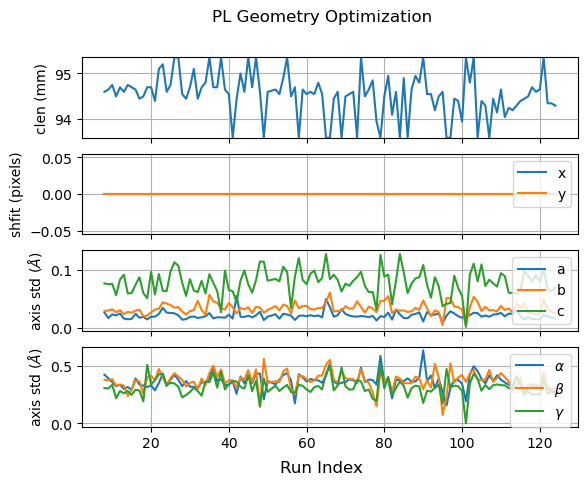

In [27]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True)

axes[0].plot(
    geometry_statistics["run_number"],
    geometry_statistics["clen"] * 1000.0
)
axes[0].grid()
axes[0].set_ylabel("clen (mm)")


axes[1].plot(
    geometry_statistics["run_number"],
    geometry_statistics["x_shift"] / PIXEL_SIZE,
)
axes[1].plot(
    geometry_statistics["run_number"],
    geometry_statistics["y_shift"] / PIXEL_SIZE,
)
axes[1].grid()
axes[1].set_ylabel("shfit (pixels)")
axes[1].legend(['x', 'y'])
axes[0].set_ylim([93.60, 95.35])


lattice_params = ['a', 'b', 'c']
for lattice_axis in lattice_params:
    axes[2].plot(
        geometry_statistics["run_number"],
        geometry_statistics[f"std_{lattice_axis}"]
    )
axes[2].grid()
axes[2].set_ylabel(r"axis std ($\AA$)")
axes[2].legend(lattice_params)


lattice_angles = ['alpha', 'beta', 'gamma']
for lattice_angle in lattice_angles:
    axes[3].plot(
        geometry_statistics["run_number"],
        geometry_statistics[f"std_{lattice_angle}"]
    )
axes[3].grid()
axes[3].set_ylabel(r"axis std ($\AA$)")
axes[3].legend([f"$\{a}$" for a in lattice_angles])


fig.suptitle('PL Geometry Optimization')
fig.supxlabel('Run Index')

plt.show()

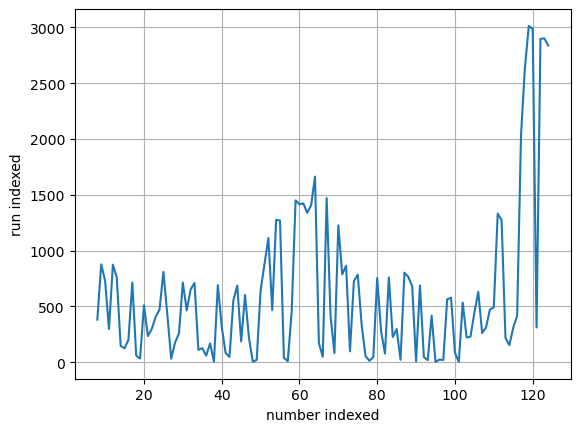

In [6]:
plt.figure()

plt.plot(
    geometry_statistics["run_number"],
    geometry_statistics["indexed"]
)
plt.grid()
plt.xlabel("number indexed")
plt.ylabel("run indexed")

plt.show()

run_number            74
x_shift              0.0
y_shift              0.0
clen             0.09535
indexed              726
std_a           0.020483
std_b           0.036192
std_c           0.096345
std_alpha        0.48438
std_beta        0.471262
std_gamma       0.364007
skew_a          0.958997
skew_b          1.082047
skew_c          1.966642
keep               False
geometry_run          74
Name: 65, dtype: object


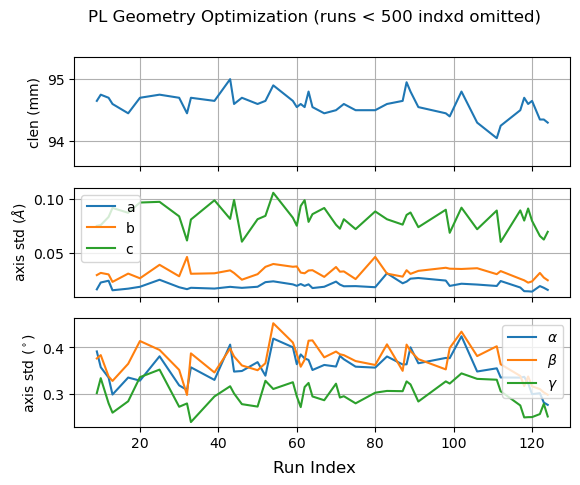

In [35]:
# subsample -- keep only runs with > number of indexed

min_num_indexed = 500

KEEP = geometry_statistics["indexed"] > min_num_indexed
KEEP[46] = False  # manual - hit limit
KEEP[65] = False  # manual - hit limit

print(geometry_statistics.iloc[65])

geometry_statistics["keep"] = KEEP

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True)

axes[0].plot(
    geometry_statistics[KEEP]["run_number"],
    geometry_statistics[KEEP]["clen"] * 1000.0
)
axes[0].set_ylim([93.60, 95.35])
axes[0].grid()
axes[0].set_ylabel("clen (mm)")



# axes[1].plot(
#     geometry_statistics[KEEP]["run_number"],
#     geometry_statistics[KEEP]["x_shift"] / PIXEL_SIZE,
# )
# axes[1].plot(
#     geometry_statistics[KEEP]["run_number"],
#     geometry_statistics[KEEP]["y_shift"] / PIXEL_SIZE,
# )
# axes[1].grid()
# axes[1].set_ylabel("shfit (pixels)")
# axes[1].legend(['x', 'y'])


lattice_params = ['a', 'b', 'c']
for lattice_axis in lattice_params:
    axes[1].plot(
        geometry_statistics[KEEP]["run_number"],
        geometry_statistics[KEEP][f"std_{lattice_axis}"]
    )
axes[1].grid()
axes[1].set_ylabel(r"axis std ($\AA$)")
axes[1].legend(lattice_params)

lattice_angles = ['alpha', 'beta', 'gamma']
for lattice_angle in lattice_angles:
    axes[2].plot(
        geometry_statistics[KEEP]["run_number"],
        geometry_statistics[KEEP][f"std_{lattice_angle}"]
    )
axes[2].grid()
axes[2].set_ylabel(r"axis std ($^\circ$)")
axes[2].legend([f"$\{a}$" for a in lattice_angles])

fig.suptitle(f'PL Geometry Optimization (runs < {min_num_indexed} indxd omitted)')
fig.supxlabel('Run Index')

plt.show()

In [26]:
# generate a snip of code for each run range

#geometry_statistics["geometry_run"] = 8
current_geometry_run = 8

for row_index, row in geometry_statistics.iterrows():
    if row["keep"]:
        current_geometry_run = row["run_number"]
    geometry_statistics.at[geometry_statistics.index[row_index], "geometry_run"] = current_geometry_run

geometry_statistics.to_csv("../data/geometry_summary.csv")